## D209 Data Mining 1 PA2
##### Submitted By Edwin Perry
### Table of Contents
<ol>
    <li><a href="#A">Research Question</a></li>
    <li><a href="#B">Method Justification</a></li>
    <li><a href="#C">Data Preparation</a></li>
    <li><a href="#D">Analysis</a></li>
    <li><a href="#E">Data Summary and Implications</a></li>
    <li><a href="#F">Panopto Video</a></li>
</ol>

#### A: Research Question
##### 1. Question
The question I elected to examine is "Can a decision-tree be used to identify which customers are likely to discontinue service?" To identify these customers may help to prevent them from discontinuing service, and even if they do discontinue service, it allows the business advance notice, allowing for customer acquisition earlier to replace lost customers
##### 2. Goal
The goal of this data analysis is to create a model that can accurately predict the customers likely to discontinue service. Customer churn causes great difficulty within the telecommunications industry, as the cost to acquire a customer is fairly high. As such, it would be preferable to retain customers for long periods of time, and when customers do leave, it would be best to know early, giving the business time to perform the customer acquisition earlier.

<a id="B"></a>

#### B: Method Justification
##### 1. Explaining Prediction Method
A decision tree is a supervised learning algorithm that works by recursively partitioning data into subsets based on the values of the inputs. At each node of the tree, a binary decision is made that will split the path the data will take. This process continues until a conclusion can be drawn, which occurs in a leaf, at which point, a label is applied to classify the data
##### 2. Assumption
Though a decision tree has few assumptions compared to other predictive models, there are still assumptions that must be made about the data. For example, decision trees assume that the relationships between the input features and the target variable are not too complex, as decision trees may not be able to capture complex interactions.
##### 3. Packages and Libraries
I've used Python as the tool to analyze this data, due to the simple syntax and useful libraries that make this analysis straightforward. The libraries used are as follows:
<ul>
<li>Pandas: Used to ingest and manipulate the data in dataframes</li>
<li>Numpy: Used for mathematical operations</li>
<li>Matplotlib: Used for data visualizations</li>
<li>Scipy: Used to generate z-scores</li>
<li>sklearn: Provides pre-processing tools</li>
<li>sklearn.feature_selection: Used to reduce multicollinearity</li>
<li>sklearn.model_selection: Used to break up the data into test and training sets and to perform hyperparameter tuning</li>
<li>sklearn.tree: Used to allow us to create a decision tree for classification</li>
<li>sklearn.ensemble: Used to improve classifier performance</li>
<li>sklearn.metrics: Used to determine the accuracy of the model</li>
</ul>

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, confusion_matrix, mean_squared_error, roc_auc_score

<a id="C"></a>

#### C: Data Preparation
##### 1. Relevant Goal
One of the primary goals of data preparation is going to be using one-hot encoding to convert the categorical columns into numerical data. To provide an example, the Area variable has possible values of Rural, Urban, and Suburban. In order to make this data usable, we are going to convert this Area column into numerical columns, Area_Urban, Area_Suburban, and Area_Rural, which will communicate the same data in a way that can be processed by the decision tree. We will do this using the get_dummies() function included in the pandas library
##### 2. Initial Data Set Variables
The following variables will be included in the initial data analysis
<ul>
<li>Churn: Categorical variable used to determine whether the customer has left the company within the past month. This will also be the dependent variable</li>
<li>Customer_id: Categorical variable, a key to distinguish between customers</li>
<li>Age: Numerical variable, used to determine the age of the customer as reported at sign up</li>
<li>Area: Categorical variable, the area type of the customer, with possible values of urban, suburban, and rural</li>
<li>Income: Numerical variable, the annual income of the customer as reported at sign-up</li>
<li>Marital: Categorical variable, the marital status of the customer</li>
<li>Gender: Categorical variable, the gender of the customer</li>
<li>Email: Numerical variable, the number of emails sent to the customer within the last year</li>
<li>Contacts: Numerical variable, the number of times the customer has contacted customer support</li>
<li>Tenure: Numerical variable, the number of months the customer has stayed with his provider</li>
<li>MonthlyCharge: Numerical variable, the amount charged to the customer monthly</li>
<li>Bandwidth_GB_Year: Numerical variable, the amount of data used in a year</li>
</ul>

##### 3. Steps Used
The first step that will occur to prepare the data is to ingest the data, as well as reducing the number of columns, such that only the relevant columns are included

In [54]:
data = pd.read_csv("/home/edwinp/Downloads/d9rkejv84kd9rk30fi2l/churn_clean.csv")
pd.set_option("display.max_columns", None)
data = data.filter(['Churn', 'Customer_id', 'Age', 'Area', 'Income', 'Marital', 'Gender', 'Email', 'Contacts', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'])
print(data.head())

  Churn Customer_id  Age      Area    Income    Marital  Gender  Email  \
0    No     K409198   68     Urban  28561.99    Widowed    Male     10   
1   Yes     S120509   27     Urban  21704.77    Married  Female     12   
2    No     K191035   50     Urban   9609.57    Widowed  Female      9   
3    No      D90850   48  Suburban  18925.23    Married    Male     15   
4   Yes     K662701   83  Suburban  40074.19  Separated    Male     16   

   Contacts     Tenure  MonthlyCharge  Bandwidth_GB_Year  
0         0   6.795513     172.455519         904.536110  
1         0   1.156681     242.632554         800.982766  
2         0  15.754144     159.947583        2054.706961  
3         2  17.087227     119.956840        2164.579412  
4         2   1.670972     149.948316         271.493436  


The next step of the data preparation is to deal with missing data. For any row that is missing data in a categorical column, the row will be dropped. If a row is missing data in a numerical column, the null value will be replaced with the median value of that column. This will ensure that no entry is missing data.

In [55]:
data['Income'].fillna(data['Income'].median(), inplace=True)
data["Tenure"].fillna(data["Tenure"].median(), inplace=True)
data["MonthlyCharge"].fillna(data["MonthlyCharge"].median(), inplace=True)
data["Email"].fillna(data["Email"].median(), inplace=True)
data["Contacts"].fillna(data["Contacts"].median(), inplace=True)
data["Age"].fillna(data["Age"].median(), inplace=True)
data["Bandwidth_GB_Year"].fillna(data["Bandwidth_GB_Year"].median(), inplace=True)
data.dropna(how='any',inplace=True)

/tmp/ipykernel_3006/2482320639.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Income'].fillna(data['Income'].median(), inplace=True)
/tmp/ipykernel_3006/2482320639.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Next, we will filter out any outliers in the numerical data. We will do so using z-scores, where any row with a z-score of greater than 3 or less than -3 will be filtered out

In [56]:
zscores = stats.zscore(data['Income'])
data['IncomeZScore'] = zscores
zscores = stats.zscore(data['Tenure'])
data['TenureZScore'] = zscores
zscores = stats.zscore(data['MonthlyCharge'])
data['MonthlyChargeZScore'] = zscores
zscores = stats.zscore(data['Email'])
data['EmailZScore'] = zscores
zscores = stats.zscore(data['Contacts'])
data['ContactsZScore'] = zscores
zscores = stats.zscore(data['Age'])
data['AgeZScore'] = zscores
zscores = stats.zscore(data['Bandwidth_GB_Year'])
data['Bandwidth_GB_YearZScore'] = zscores
data = data.query("(IncomeZScore < 3 & IncomeZScore > -3) & (TenureZScore < 3 & TenureZScore > -3) & (MonthlyChargeZScore < 3 & MonthlyChargeZScore > -3) & (Bandwidth_GB_YearZScore < 3 & Bandwidth_GB_YearZScore > -3) & (EmailZScore < 3 & EmailZScore > -3) &  (AgeZScore < 3 & AgeZScore > -3) & (ContactsZScore < 3 & ContactsZScore > -3)")
data = data.drop(columns=['IncomeZScore', 'TenureZScore', 'MonthlyChargeZScore', 'EmailZScore', 'ContactsZScore', 'AgeZScore', 'Bandwidth_GB_YearZScore', 'Customer_id'])

As the final step, we will perform the one-hot encoding, removing columns with high multicollinearity that would be produced

In [57]:
data = pd.get_dummies(data, columns=['Gender', 'Area', 'Marital'], dtype=int)
data["Churn"] = data["Churn"].apply(lambda x: 1 if x == "Yes" else 0)
data = data.drop(columns=['Gender_Nonbinary', 'Area_Rural', 'Marital_Married'])
df_X = data.drop(['Churn'], axis=1).copy()
df_y = data['Churn'].copy()
df_X = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_X), columns=df_X.columns)
feat_select = SelectKBest(f_classif, k='all')
feat_select.fit_transform(df_X, df_y)
feat_pvals = pd.DataFrame({'Feature' : df_X.columns, 'p_value' : feat_select.pvalues_}).sort_values('p_value') 
feat_pvals[feat_pvals['p_value'] < 0.05]

,Feature,p_value
4,Tenure,0.000000e+00
6,Bandwidth_GB_Year,0.000000e+00
5,MonthlyCharge,1.399130e-316
8,Gender_Male,5.630774e-03
7,Gender_Female,7.074538e-03


##### 4. Copy of Data

In [58]:
data.to_csv('./D209P2CleanedData.csv')

#### D: Analysis
##### 1. Data Splitting
Below is the code to split the data into test and training sets, which are contained within attached csv files

In [59]:
df_x = data.drop(['Churn'], axis=1).copy()
df_y = data['Churn'].copy()
X = df_x[["Tenure", "Gender_Male", "Gender_Female", 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
y = df_y
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state = 42, stratify = y)

X_train.to_csv('task2_Xtrain.csv', index=False)
X_test.to_csv('task2_Xtest.csv', index=False)
y_train.to_csv('task2_ytrain.csv', index=False)
y_test.to_csv('task2_ytest.csv', index=False)

##### 2. Analysis Description


In [60]:
params_dt = {
    'max_depth' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_leaf' : [0.04, 0.06, 0.08, 0.10, 0.12, 0.14, 0.16, 0.18, 0.20, 0.22]
}
dt = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(dt, param_grid = params_dt, cv = 5, n_jobs=-1)
grid_dt.fit(X_train, y_train)
best_model = grid_dt.best_estimator_
initial_y = best_model.predict(X_test)
acc = accuracy_score(y_test, initial_y)
print('Test set accuracy of best decision tree: {:.2f}'.format(acc)) 
initial_y_pred = best_model.predict_proba(X_test)[:, 1]
initial_roc_auc = roc_auc_score(y_test, initial_y_pred)
print('Test set AUC of best decision tree: {:.3f}'.format(initial_roc_auc))

Test set accuracy of best decision tree: 0.83
Test set AUC of best decision tree: 0.887


In [61]:
params_ada = {
    'n_estimators' : [160, 180, 200],
    'learning_rate' : [0.9, 1.0, 1.1, 1.2, 1.3]
}

# Instantiate tuned decision tree
final_dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=0.06, random_state=42)

# Instantiate initial adaboost
initial_ada = AdaBoostClassifier(estimator=final_dt, random_state=42)

# Instantiate grid_ab
grid_ada = GridSearchCV(estimator=initial_ada,
                       param_grid=params_ada,
                       scoring='roc_auc',
                       cv=5,
                       n_jobs=-1)

# Fit grid search to training model
grid_ada.fit(X_train, y_train)

# Display the most effective parameters
print(grid_ada.best_params_)
# FINAL TUNED MODEL
# Instantiate dt
final_dt = DecisionTreeClassifier(max_depth=8, min_samples_leaf=0.06, random_state=42)

# Instantiate ada
final_ada = AdaBoostClassifier(estimator=final_dt, n_estimators=200, learning_rate = 1.2, random_state=42)

# Fit ada to the training set
final_ada.fit(X_train, y_train)

# Predict test set labels
final_y_pred = final_ada.predict(X_test)

# Evaluate acc_test
final_acc_test = accuracy_score(y_test, final_y_pred)
print('Test set accuracy of final decision tree model: {:.2f}'.format(final_acc_test)) 

# Compute the probabilities of obtaining the positive class
final_y_pred_proba = final_ada.predict_proba(X_test)[:,1]

# Evaluate test-set roc_auc_score
final_roc_auc = roc_auc_score(y_test, final_y_pred_proba)

# Generate Confusion Matrix
final_matrix = confusion_matrix(y_test, final_y_pred)
print("\nThe confusion matrix for this AdaBoosted Decision Tree model:")
print("Predicted No Churn | Predicted Churn")
print(f"                   {final_matrix[0]} Actual No Churn")
print(f"                   {final_matrix[1]} Actual Churn\n")

# Generate mean_squared_error and root mean squared error
mse = mean_squared_error(y_test, final_y_pred)
root_mse = mse**(1/2)
print(f"The mean squared error of this model is: {mse}")
print(f"The root mean squared error of this model is: {round(root_mse, 2)}\n\n")

# Generate classification report
print(classification_report(y_test, final_y_pred))

print('\nThe Area Under the Curve (AUC) score of the final decision tree model is: {:.2f}'.format(final_roc_auc))


/home/edwinp/.conda/envs/Class/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/edwinp/.conda/envs/Class/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/edwinp/.conda/envs/Class/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/edwinp/.conda/envs/Class/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME

{'learning_rate': 0.9, 'n_estimators': 180}


/home/edwinp/.conda/envs/Class/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Test set accuracy of final decision tree model: 0.83

The confusion matrix for this AdaBoosted Decision Tree model:
Predicted No Churn | Predicted Churn
                   [1284  141] Actual No Churn
                   [181 330] Actual Churn

The mean squared error of this model is: 0.16632231404958678
The root mean squared error of this model is: 0.41


              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1425
           1       0.70      0.65      0.67       511

    accuracy                           0.83      1936
   macro avg       0.79      0.77      0.78      1936
weighted avg       0.83      0.83      0.83      1936


The Area Under the Curve (AUC) score of the final decision tree model is: 0.89


<a id= "E"></a>

#### E: Data Summary and Implications
##### 1. Accuracy and Mean Squared Error (MSE)
The model overall has an accuracy rate of 83% and an AUC score of 0.89, which is a significant improvement over the scores that would be expected from random guessing, which would be expected to have an accuracy of 50%.
The mean squared error (MSE) is 0.166. The closer that the MSE score is to 0, the more accurate the model is at predicting the data. While MSE is not an ideal choice to evaluate a binary classification, as MSE assumes a normal distribution, even so, the low value of the MSE shows that there is a sizeable degree of reliability with this model
##### 2. Results and Implications
As I had explained, the model overall shows a reasonably high accuracy and AUC score. Below is a chart that visualizes the effectiveness of this model as opposed to the ROC curve, which is the expected effectiveness of random guessing


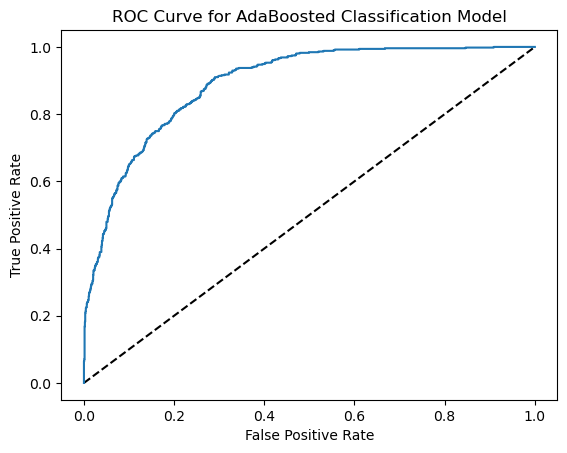

In [62]:
fpr, tpr, thresholds = roc_curve(y_test, final_y_pred_proba)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoosted Classification Model')
plt.show()

Though this model is clearly not perfect in identification, it correctly classifies the data in a majority of instances and should be considered generally reliable
##### 3. Limitations
When it comes to the limitations of the model, the primary concern is the limited size of the dataset, only including 10000 rows. When you consider the necessity to split the data between test and training data, the limited size of the dataset is a concern, as it is unclear whether the data can be generalized for future classification. Ideally, I would have preferred a dataset with at least 50000 rows, to reduce this as a possibility and grow both the training and testing datasets
##### 4. Recommended Course of Action
With the fairly high accuracy of this model, I would recommend that the model be employed to identify those customers that are likely to leave the company. This would both allow the business to take action to retain customers and allow the business to forecast how many customers may leave, allowing for the business to prepare to acquire new customers when necessary
<a id="F"></a>

#### F: Panopto Video
A video recording of my presentation can be found at the following link: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=ba31bad7-a997-431c-8892-b1d900283e7d
#### G: Code References
<a href="https://campus.datacamp.com/courses/machine-learning-with-tree-based-models-in-python/classification-and-regression-trees?ex=1">DataCamp class material by Elie Kawerk</a> was used to create the Decision Tree model

<a href= "https://campus.datacamp.com/courses/machine-learning-with-scikit-learn/fine-tuning-your-model?ex=8">DataCamp class material by George Boorman (AUC Computation)</a> was used for the code explaining how to compute the AUC score

<a href="https://campus.datacamp.com/courses/machine-learning-with-scikit-learn/fine-tuning-your-model?ex=5"> DataCamp class material by George Boorman (Plotting an ROC Curve)</a> was used for the code to plot the ROC curve, to visualize the AUC score

#### H: Source References
<a href="https://towardsdatascience.com/why-using-mean-squared-error-mse-cost-function-for-binary-classification-is-a-bad-idea-933089e90df7"> Rafay Khan: Why Using Mean Squared Error(MSE) Cost Function for Binary Classification is a Bad Idea? </a> was used to analyze the efficacy of MSE for binary classification models